In [1]:
import csv
import pandas as pd

import os
import sys

module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

%load_ext autoreload
%autoreload 2
    
from experiments.pretraining_vs_finetuning.finetuning_volume.volume_buckets import finetuning_proportion_buckets

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 36613.57it/s]


Text(0, 0.5, 'Corrected P(STAY)')

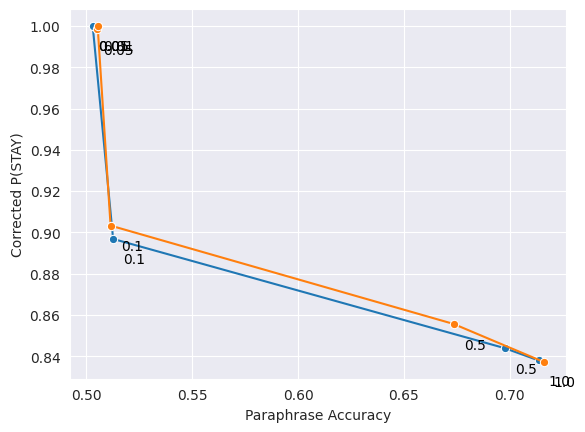

In [8]:
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

def plot_finetuning_trend(dataset):
    x = []
    y = []
    
    for prop, datasets in finetuning_proportion_buckets.items():
    
        summary = datasets[f'{dataset}-human'].linguistic_robustness_summary(datasets[f'{dataset}-test'])
        
        acc = summary['paraphrase_accuracy_corrected'] #datasets[f'{dataset}-test'].accuracy
        p_stay_c = summary['stay_prob_corrected']
        
        x.append(acc)
        y.append(p_stay_c)
    
    
    sns.lineplot(x=x, y=y, marker='o')
    for i, words in enumerate(list(finetuning_proportion_buckets.keys())):
        plt.text(x[i]+0.01, y[i]-0.01, words, fontsize=10, ha='center', va='center', color='black')

plot_finetuning_trend('snli')
plot_finetuning_trend('atomic')
#plot_finetuning_trend('social')

ax = plt.gca()
ax.set_xlabel("Paraphrase Accuracy")
ax.set_ylabel("Corrected P(STAY)")

In [ ]:
including autogen examples and project label through during finetuning 

1, 5, 10, 50, 100


as the model starts to learn, it is more likely to be inconsistent (wrong distinctions between paraphrased examples)
it's possible with more data that we see a dip back up for p(stay) but no guarantees